# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Kaggle (Boston House Prices-Advanced Regression Techniques) - https://www.kaggle.com/datasets/fedesoriano/the-boston-houseprice-data

2. **Deskripsi Singkat**:
  Dataset Boston House Price dari Kaggle berisi informasi mengenai harga rumah di berbagai wilayah di Boston, Amerika Serikat. Setiap baris mewakili satu area perumahan dengan fitur-fitur yang menggambarkan kondisi lingkungan, seperti tingkat kriminalitas di sekitar kawasan (CRIM), rata-rata jumlah kamar rumah (RM), jarak kawasan tersebut ke pusat fasilitas kota (DIS), hingga persentase penduduk dengan kondisi sosial ekonomi yang lebih rendah (LSTAT).
  Target utamanya adalah MEDV, yaitu median harga rumah dalam ribuan dolar. Dataset ini sudah bersih dan tidak memiliki nilai yang hilang, sehingga mudah digunakan untuk membangun model regresi, khususnya untuk memprediksi harga rumah berdasarkan karakteristik lingkungan di sekitarnya. Dataset ini sederhana namun informatif, sehingga sering dipakai untuk latihan dan eksperimen dalam pembelajaran machine learning.


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [1]:
# Library untuk manipulasi data
import numpy as np
import pandas as pd

# Library untuk visualisasi data
import matplotlib.pyplot as plt
import seaborn as sns

# Library untuk pemrosesan data & modelling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [2]:
# Membaca dataset dari file CSV
df = pd.read_csv("../boston.csv")

# Menampilkan 5 baris pertama
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [3]:
# Menampilkan informasi data 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [4]:
# Menampilkan statistik deskriptif
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [5]:
# Mengecek jumlah nilai kosong di setiap kolom
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

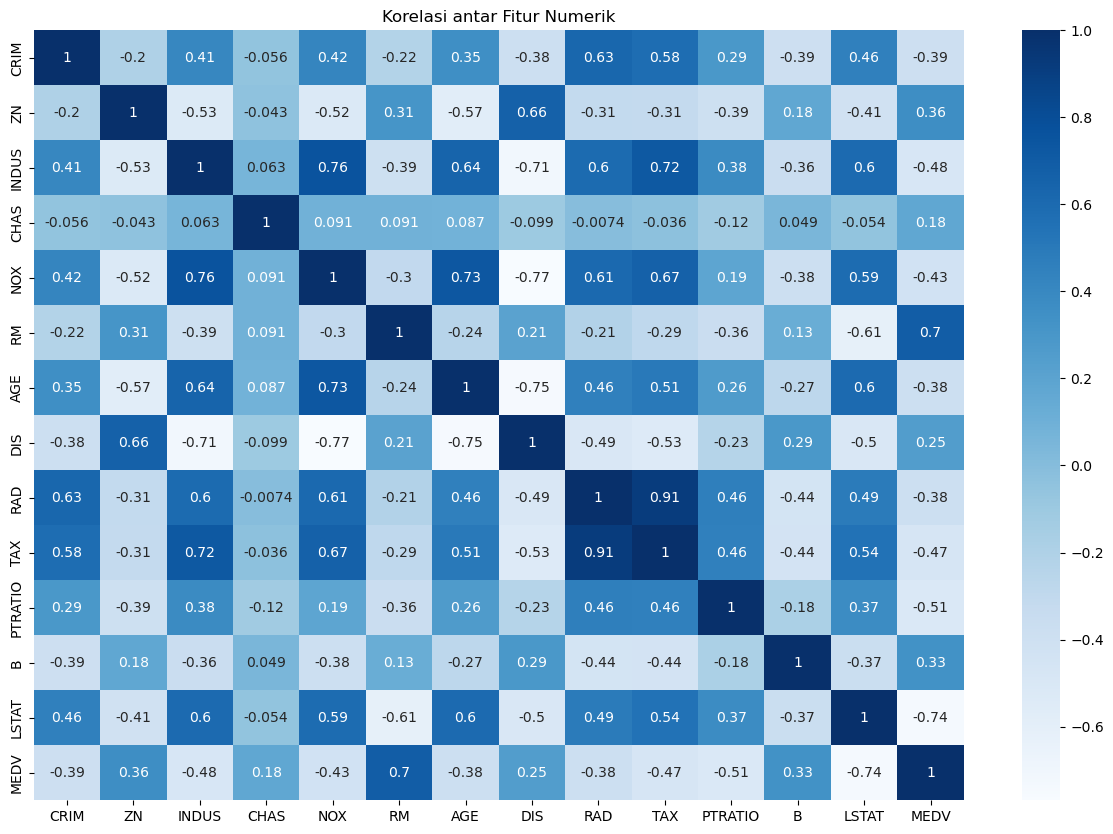

In [9]:
# --- Cek korelasi antar fitur numerik ---
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='Blues')
plt.title("Korelasi antar Fitur Numerik")
plt.show()

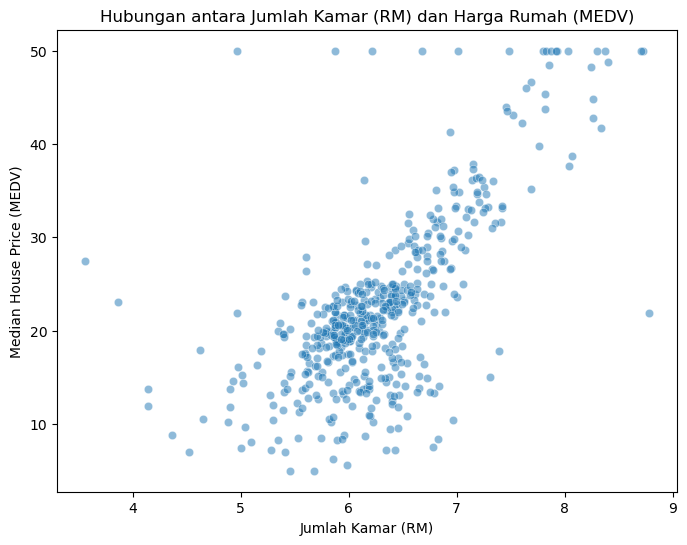

In [11]:
# Hubungan antara jumlah kamar dan harga rumah
plt.figure(figsize=(8,6))
sns.scatterplot(x="RM", y="MEDV", data=df, alpha=0.5)
plt.title("Hubungan antara Jumlah Kamar (RM) dan Harga Rumah (MEDV)")
plt.xlabel("Jumlah Kamar (RM)")
plt.ylabel("Median House Price (MEDV)")
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

### Menghapus data kosong (Missing Values) ###

In [13]:
# hapus baris kosong
df = df.dropna() 

### Memeriksa data duplikat ###

In [14]:
# Cek jumlah data sebelum dan sesudah hapus duplikasi
print("Jumlah data sebelum:", len(df))

# Hapus baris yang terduplikasi
df.drop_duplicates(inplace=True)

print("Jumlah data sesudah:", len(df))

Jumlah data sebelum: 506
Jumlah data sesudah: 506


### Normalisasi/Standarisasi fitur

In [15]:
# Pisahin fitur (X) dan target (y)
# MEDV = harga rumah → target
X = df.drop("MEDV", axis=1)
y = df["MEDV"]

# Buat scaler buat nyamain skala fitur
scaler = StandardScaler()

# Fit dan transform fitur numerik
X_scaled = scaler.fit_transform(X)

# Lihat contoh hasil scaling
X_scaled[:5]

array([[-0.41978194,  0.28482986, -1.2879095 , -0.27259857, -0.14421743,
         0.41367189, -0.12001342,  0.1402136 , -0.98284286, -0.66660821,
        -1.45900038,  0.44105193, -1.0755623 ],
       [-0.41733926, -0.48772236, -0.59338101, -0.27259857, -0.74026221,
         0.19427445,  0.36716642,  0.55715988, -0.8678825 , -0.98732948,
        -0.30309415,  0.44105193, -0.49243937],
       [-0.41734159, -0.48772236, -0.59338101, -0.27259857, -0.74026221,
         1.28271368, -0.26581176,  0.55715988, -0.8678825 , -0.98732948,
        -0.30309415,  0.39642699, -1.2087274 ],
       [-0.41675042, -0.48772236, -1.30687771, -0.27259857, -0.83528384,
         1.01630251, -0.80988851,  1.07773662, -0.75292215, -1.10611514,
         0.1130321 ,  0.41616284, -1.36151682],
       [-0.41248185, -0.48772236, -1.30687771, -0.27259857, -0.83528384,
         1.22857665, -0.51117971,  1.07773662, -0.75292215, -1.10611514,
         0.1130321 ,  0.44105193, -1.02650148]])

### Deteksi dan Penanganan Outlier (IQR Method)

In [16]:
# Hitung Q1, Q3, dan IQR buat semua kolom
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Filter data yang masih dalam batas normal (bukan outlier)
df_clean = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

# Lihat jumlah data setelah outlier dihapus
df_clean.shape

(268, 14)

### Encoding Data Kategorikal

In [17]:
# Di dataset Boston, fitur kategorikal hanya CHAS (0 = tidak dekat sungai, 1 = dekat)
# Kita ubah tipe datanya jadi kategori biar rapi
df_clean["CHAS"] = df_clean["CHAS"].astype("category")

# Cek tipe data terbaru
df_clean.dtypes

C:\Users\zizah\AppData\Local\Temp\ipykernel_21456\555141653.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean["CHAS"] = df_clean["CHAS"].astype("category")


CRIM        float64
ZN          float64
INDUS       float64
CHAS       category
NOX         float64
RM          float64
AGE         float64
DIS         float64
RAD           int64
TAX         float64
PTRATIO     float64
B           float64
LSTAT       float64
MEDV        float64
dtype: object

### Modeling ###

In [18]:
# Ubah X_scaled dari array ke DataFrame
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# Gabung kembali fitur yang sudah distandarisasi dengan target MEDV
df_processed = pd.concat([X_scaled_df, y.reset_index(drop=True)], axis=1)

print("Data setelah preprocessing:", df_processed.shape)

# Simpan dataset hasil preprocessing
df_processed.to_csv("boston_data_preprocessed.csv", index=False)

Data setelah preprocessing: (506, 14)


### Split data ###

In [20]:
# Pisahkan fitur (X) dan target (y)
X = df_processed.drop("MEDV", axis=1)   
y = df_processed["MEDV"]                

# Bagi data jadi 80% latih dan 20% uji
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Cek jumlah data latih dan data uji
print("Jumlah data latih:", X_train.shape[0])
print("Jumlah data uji  :", X_test.shape[0])

Jumlah data latih: 404
Jumlah data uji  : 102


### Latih Model ###

In [21]:
# Inisialisasi model Random Forest Regressor
model = RandomForestRegressor(
    n_estimators=100,     
    random_state=42,      
    n_jobs=-1             
)

# Latih model menggunakan data latih
model.fit(X_train, y_train)

# Lakukan prediksi pada data uji
y_pred = model.predict(X_test)

# Evaluasi performa model menggunakan MSE dan R²
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("=== HASIL EVALUASI MODEL ===")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score                : {r2:.4f}")

=== HASIL EVALUASI MODEL ===
Mean Squared Error (MSE): 7.93
R² Score                : 0.8919
